## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [2]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = '/Users/seanhung06/Documents/GitHub/Data'

### 之前做過的處理

In [19]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
#list out the data frame data column and rows
app_train.shape  

(307511, 122)

In [20]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()


(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [21]:
app_train['DAYS_EMPLOYED'][app_train['DAYS_EMPLOYED'] > 365000] = np.nan

### 連續型特徵離散化
雖然由之前的分析發現 DAYS_BIRTH 與 TARGET 的相關係數只有 -0.07，  
但在往後的課程裡，為了實際解決問題，我們將需透過一些處理方法，改善相關係數。  
目前我們先以對資料的常識理解，去觀察這兩個欄位的交叉狀況。

In [29]:
app_train['DAYS_EMPLOYED'].describe()
app_train['DAYS_EMPLOYED_abd'] = abs(app_train['DAYS_EMPLOYED'])/365
app_train['DAYS_EMPLOYED_abd'].describe()

count    252137.000000
mean          6.531971
std           6.406466
min           0.000000
25%           2.101370
50%           4.515068
75%           8.698630
max          49.073973
Name: DAYS_EMPLOYED_abd, dtype: float64

In [30]:
# 先來看看 'DAYS_BIRTH' 的統計描述吧 (pandas.describe())
print("Correlation between DAYS_EMPLOYED and AMT_INCOME_TOTAL", app_train['DAYS_EMPLOYED_abd'].corr(app_train['AMT_INCOME_TOTAL']))


Correlation between DAYS_EMPLOYED and AMT_INCOME_TOTAL 0.01300471694479034


In [41]:
#app_train['DAYS_EMPLOYED_abd'].describe()
app_train['TARGET'].describe()
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train_2 = pd.read_csv(f_app_train)
#list out the data frame data column and rows
app_train_2.shape  

0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: int64

In [47]:
# 將年齡相關資料, 另外存成一個 DataFrame 來處理
income_data = app_train[['DAYS_EMPLOYED_abd', 'AMT_INCOME_TOTAL']]

# 將年齡資料離散化 / 分組
income_data['YEARS_BINNED'] = pd.cut(income_data['DAYS_EMPLOYED_abd'], bins = np.linspace(0, 50, num = 6))
income_data.head(10)

,DAYS_EMPLOYED_abd,AMT_INCOME_TOTAL,YEARS_BINNED
0,1.745205,202500.0,"(0.0, 10.0]"
1,3.254795,270000.0,"(0.0, 10.0]"
2,0.616438,67500.0,"(0.0, 10.0]"
3,8.326027,135000.0,"(0.0, 10.0]"
4,8.323288,121500.0,"(0.0, 10.0]"
5,4.350685,99000.0,"(0.0, 10.0]"
6,8.575342,171000.0,"(0.0, 10.0]"
7,1.230137,360000.0,"(0.0, 10.0]"
8,NaN,112500.0,NaN
9,5.531507,135000.0,"(0.0, 10.0]"


In [48]:
# 依照組別彙整年齡資料 "每一欄的平均值"
income_groups  = income_data.groupby('YEARS_BINNED').mean()
income_groups

,DAYS_EMPLOYED_abd,AMT_INCOME_TOTAL
YEARS_BINNED,,
"(0.0, 10.0]",3.928111,174348.216601
"(10.0, 20.0]",13.662366,185018.399782
"(20.0, 30.0]",23.945354,172787.377149
"(30.0, 40.0]",33.725897,174189.570606
"(40.0, 50.0]",42.419588,176444.230769


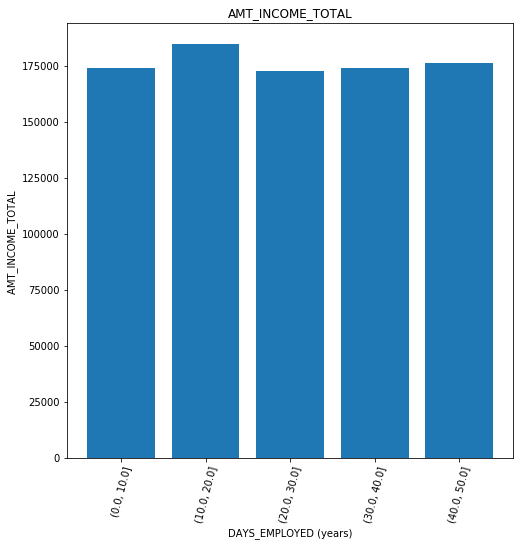

In [49]:
plt.figure(figsize = (8, 8))

# 繪製目標值平均與分組組別的長條圖
plt.bar(range(len(income_groups.index)), income_groups['AMT_INCOME_TOTAL'])
# 加上 X, y 座標說明, 以及圖表的標題
plt.xticks(range(len(income_groups.index)), income_groups.index, rotation = 75); plt.xlabel('DAYS_EMPLOYED (years)'); plt.ylabel('AMT_INCOME_TOTAL ')
plt.title('AMT_INCOME_TOTAL');

In [ ]:
DAYS_EMPLOYED 與 AMT_INCOME_TOTAL 並無太多關係